In [5]:
%matplotlib inline
import predict
import os
import numpy as np
from keras.models import load_model
from vis.visualization import visualize_activation
from scipy.stats import normaltest
import seaborn as sns

In [2]:
model = predict.build_model()

In [3]:
stages = ('CIS', 'RR', 'SP', 'PP')
path = 'Matrices/{}'
heatmaps = list()

for stage in stages:
    for patient in os.listdir(path.format(stage)):
        if not patient.startswith('.'):
            graph_adjacency = np.genfromtxt('{}/{}'.format(path.format(stage), patient))
            #print(graph_adjacency.shape)

            pred_bn, confidences = model.predict(graph_adjacency)
            
            #print('Computing partial derivatives for each samples')
            #print('This operation requires time...')
            
            # compute for each edge the partial derivatives according to Simonyan et al (2013)
            heatmap = visualize_activation(model.model, layer_idx=-1, filter_indices=0, seed_input=graph_adjacency)
            #print(heatmap.shape)
            heatmaps.append(heatmap)
        break
    break

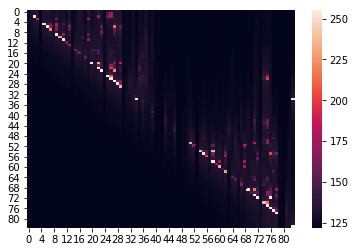

In [6]:
sns.heatmap(heatmaps[0])

In [8]:
np.save('matrix_aldo.npy', heatmaps[0])